<a href="https://colab.research.google.com/github/esthermead/deeplearning/blob/master/GPU_deep_learning_in_Google_Colab_for_free.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# setting up Google Colab on your UALR student Google Drive to conduct Deep Learning.
# first, follow steps from: https://medium.com/deep-learning-turkey/google-colab-free-gpu-tutorial-e113627b9f5d
# note: don't install all of the stuff that is on the tutorial; just the keras. I ran into some errors during this and had to kill it and start over, but figured it out. If you need help, let me know (elmead@ualr.edu).


In [0]:
from google.colab import drive
drive.mount('/content/drive/')

In [5]:
# testing the example to see if all is set up properly.
!python3 "/content/drive/My Drive/DeepLearning/mnist_cnn.py"

Using TensorFlow backend.
11493376/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
2019-03-30 20:10:48.539184: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2019-03-30 20:10:48.539505: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x3125340 executing computations on platform Host. Devices:
2019-03-30 20:10:48.539547: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): <undefined>, <undefined>
2019-03-30 20:10:48.633010: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:998] successful NUMA node read from SysFS had negative value

In [6]:
# another example.
!wget https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/Titanic.csv -P "/content/drive/My Drive/DeepLearning/"

--2019-03-30 20:13:13--  https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/Titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1170 (1.1K) [text/plain]
Saving to: ‘/content/drive/My Drive/DeepLearning/Titanic.csv’

Titanic.csv         100%[===================>]   1.14K  --.-KB/s    in 0s      

2019-03-30 20:13:13 (148 MB/s) - ‘/content/drive/My Drive/DeepLearning/Titanic.csv’ saved [1170/1170]



In [7]:
import pandas as pd
titanic = pd.read_csv("/content/drive/My Drive/DeepLearning/Titanic.csv")
titanic.head(5)

,Unnamed: 0,Class,Sex,Age,Survived,Freq
0,1,1st,Male,Child,No,0
1,2,2nd,Male,Child,No,0
2,3,3rd,Male,Child,No,35
3,4,Crew,Male,Child,No,0
4,5,1st,Female,Child,No,0


In [31]:
# checking to see if the project folder i created is there and is holding the contents that I got from the examples; i called it "DeepLearning".
!ls "/content/drive/My Drive/DeepLearning"

deep_learning_turkey.ipynb  mnist_cnn.py  Titanic.csv


In [0]:
# end of first tutorial (above).
# watch this video is you ran into problems setting up the google colab: https://www.youtube.com/watch?v=Bn_jRbQcmV4

# next, try to recreate the cigarette butt instance segmentation project.
# links that you will need to find all instructions and files:
# https://github.com/akTwelve/tutorials/blob/master/mask_rcnn/MaskRCNN_TrainAndInference.ipynb
# http://www.immersivelimit.com/tutorials/using-mask-r-cnn-on-custom-coco-like-dataset
# https://github.com/matterport/Mask_RCNN
# https://github.com/akTwelve/tutorials


In [4]:
# checking what is my present working directory.
!pwd

/content


In [8]:
# what is in there?
!ls /content/

sample_data


In [10]:
# mount my google drive so that i can get to where my DeepLearning project directory is.
from google.colab import drive
drive.mount('/content/drive/')
# at this point you have to get a code that google generates in a new window; copy and paste it in the box that will show up below and press enter on your keyboard.

!ls /content/

drive  sample_data


In [11]:
!ls drive

'My Drive'  'Team Drives'


In [20]:
# i created my DeepLearning project directory in my My Drive; so now  i need to change to that to my present working directory.

cd "/content/drive/My Drive/DeepLearning"

/content/drive/My Drive/DeepLearning


In [21]:
# i can see that all i have in there so far are the files from the examples i did during google colab set up.

!ls

deep_learning_turkey.ipynb  mnist_cnn.py  Titanic.csv


In [22]:
# just to make sure my DeepLearning folder is my present working directory before i get anymore files.
!pwd

/content/drive/My Drive/DeepLearning


In [23]:
# now clone the github repositories needed to do the cigarette butt instance segmentation project.
!git clone https://github.com/akTwelve/tutorials.git

Cloning into 'tutorials'...
remote: Enumerating objects: 32, done.
remote: Total 32 (delta 0), reused 0 (delta 0), pack-reused 32
Unpacking objects: 100% (32/32), done.


In [24]:
!git clone https://github.com/akTwelve/Mask_RCNN.git

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 780, done.
remote: Total 780 (delta 0), reused 0 (delta 0), pack-reused 780
Receiving objects: 100% (780/780), 101.33 MiB | 10.37 MiB/s, done.
Resolving deltas: 100% (439/439), done.
Checking out files: 100% (70/70), done.


In [0]:
# following this tutorial now: https://github.com/akTwelve/tutorials/blob/master/mask_rcnn/MaskRCNN_TrainAndInference.ipynb

import os
import sys
import json
import numpy as np
import time
from PIL import Image, ImageDraw

In [28]:
# Set the ROOT_DIR variable to the root directory of the Mask_RCNN git repo
# change "DeepLearning" to whatever you named your folder.
ROOT_DIR = '/content/drive/My Drive/DeepLearning/Mask_RCNN'
assert os.path.exists(ROOT_DIR), 'ROOT_DIR does not exist. Did you forget to read the instructions above? ;)'

# Import mrcnn libraries
sys.path.append(ROOT_DIR) 
from mrcnn.config import Config
import mrcnn.utils as utils
from mrcnn import visualize
import mrcnn.model as modellib

Using TensorFlow backend.


In [0]:
# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")

# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

In [30]:
class CigButtsConfig(Config):
    """Configuration for training on the cigarette butts dataset.
    Derives from the base Config class and overrides values specific
    to the cigarette butts dataset.
    """
    # Give the configuration a recognizable name
    NAME = "cig_butts"

    # Train on 1 GPU and 1 image per GPU. Batch size is 1 (GPUs * images/GPU).
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

    # Number of classes (including background)
    NUM_CLASSES = 1 + 1  # background + 1 (cig_butt)

    # All of our training images are 512x512
    IMAGE_MIN_DIM = 512
    IMAGE_MAX_DIM = 512

    # You can experiment with this number to see if it improves training
    STEPS_PER_EPOCH = 500

    # This is how often validation is run. If you are using too much hard drive space
    # on saved models (in the MODEL_DIR), try making this value larger.
    VALIDATION_STEPS = 5
    
    # Matterport originally used resnet101, but I downsized to fit it on my graphics card
    BACKBONE = 'resnet50'

    # To be honest, I haven't taken the time to figure out what these do
    RPN_ANCHOR_SCALES = (8, 16, 32, 64, 128)
    TRAIN_ROIS_PER_IMAGE = 32
    MAX_GT_INSTANCES = 50 
    POST_NMS_ROIS_INFERENCE = 500 
    POST_NMS_ROIS_TRAINING = 1000 
    
config = CigButtsConfig()
config.display()


Configurations:
BACKBONE                       resnet50
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_MAX_DIM                  512
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  512
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [512 512   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE                     [28, 28]
MAX_GT_INSTANCES 

In [0]:
class CocoLikeDataset(utils.Dataset):
    """ Generates a COCO-like dataset, i.e. an image dataset annotated in the style of the COCO dataset.
        See http://cocodataset.org/#home for more information.
    """
    def load_data(self, annotation_json, images_dir):
        """ Load the coco-like dataset from json
        Args:
            annotation_json: The path to the coco annotations json file
            images_dir: The directory holding the images referred to by the json file
        """
        # Load json from file
        json_file = open(annotation_json)
        coco_json = json.load(json_file)
        json_file.close()
        
        # Add the class names using the base method from utils.Dataset
        source_name = "coco_like"
        for category in coco_json['categories']:
            class_id = category['id']
            class_name = category['name']
            if class_id < 1:
                print('Error: Class id for "{}" cannot be less than one. (0 is reserved for the background)'.format(class_name))
                return
            
            self.add_class(source_name, class_id, class_name)
        
        # Get all annotations
        annotations = {}
        for annotation in coco_json['annotations']:
            image_id = annotation['image_id']
            if image_id not in annotations:
                annotations[image_id] = []
            annotations[image_id].append(annotation)
        
        # Get all images and add them to the dataset
        seen_images = {}
        for image in coco_json['images']:
            image_id = image['id']
            if image_id in seen_images:
                print("Warning: Skipping duplicate image id: {}".format(image))
            else:
                seen_images[image_id] = image
                try:
                    image_file_name = image['file_name']
                    image_width = image['width']
                    image_height = image['height']
                except KeyError as key:
                    print("Warning: Skipping image (id: {}) with missing key: {}".format(image_id, key))
                
                image_path = os.path.abspath(os.path.join(images_dir, image_file_name))
                image_annotations = annotations[image_id]
                
                # Add the image using the base method from utils.Dataset
                self.add_image(
                    source=source_name,
                    image_id=image_id,
                    path=image_path,
                    width=image_width,
                    height=image_height,
                    annotations=image_annotations
                )
                
    def load_mask(self, image_id):
        """ Load instance masks for the given image.
        MaskRCNN expects masks in the form of a bitmap [height, width, instances].
        Args:
            image_id: The id of the image to load masks for
        Returns:
            masks: A bool array of shape [height, width, instance count] with
                one mask per instance.
            class_ids: a 1D array of class IDs of the instance masks.
        """
        image_info = self.image_info[image_id]
        annotations = image_info['annotations']
        instance_masks = []
        class_ids = []
        
        for annotation in annotations:
            class_id = annotation['category_id']
            mask = Image.new('1', (image_info['width'], image_info['height']))
            mask_draw = ImageDraw.ImageDraw(mask, '1')
            for segmentation in annotation['segmentation']:
                mask_draw.polygon(segmentation, fill=1)
                bool_array = np.array(mask) > 0
                instance_masks.append(bool_array)
                class_ids.append(class_id)

        mask = np.dstack(instance_masks)
        class_ids = np.array(class_ids, dtype=np.int32)
        
        return mask, class_ids

In [0]:
dataset_train = CocoLikeDataset()
dataset_train.load_data('tutorials/datasets/cig_butts/train/coco_annotations.json', 'tutorials/datasets/cig_butts/train/images')
dataset_train.prepare()

dataset_val = CocoLikeDataset()
dataset_val.load_data('tutorials/datasets/cig_butts/val/coco_annotations.json', 'tutorials/datasets/cig_butts/val/images')
dataset_val.prepare()

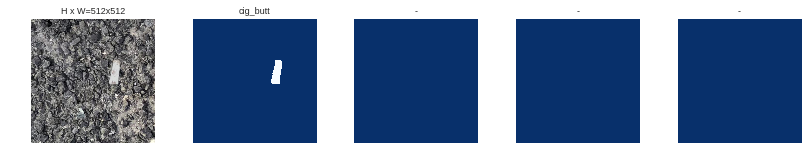

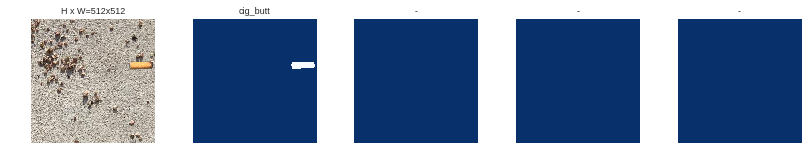

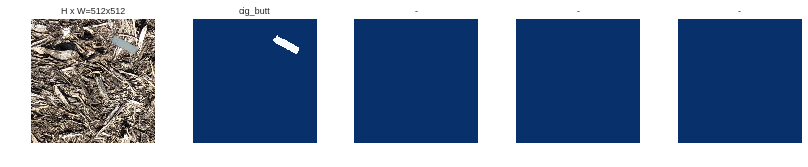

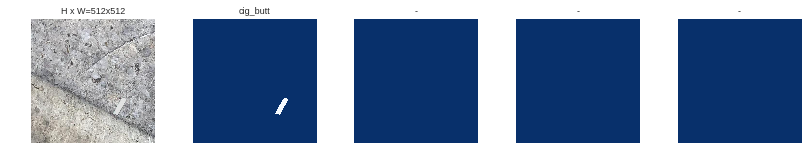

In [47]:
# if you get an error during this code block, open up the "visualize.py" file that is in the "mrcnn" folder using TextEdit or something similar and correct the root directory that it is set to, save it and replace in your google drive project folder.

dataset = dataset_train
image_ids = np.random.choice(dataset.image_ids, 4)
for image_id in image_ids:
    image = dataset.load_image(image_id)
    mask, class_ids = dataset.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset.class_names)

In [42]:
# i just want to check again to make sure my present working directory is correct.
!pwd

/content/drive/My Drive/DeepLearning


In [48]:
# Create model in training mode
model = modellib.MaskRCNN(mode="training", config=config,
                          model_dir=MODEL_DIR)

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
# Which weights to start with?
init_with = "coco"  # imagenet, coco, or last

if init_with == "imagenet":
    model.load_weights(model.get_imagenet_weights(), by_name=True)
elif init_with == "coco":
    # Load weights trained on MS COCO, but skip layers that
    # are different due to the different number of classes
    # See README for instructions to download the COCO weights
    model.load_weights(COCO_MODEL_PATH, by_name=True,
                       exclude=["mrcnn_class_logits", "mrcnn_bbox_fc", 
                                "mrcnn_bbox", "mrcnn_mask"])
elif init_with == "last":
    # Load the last model you trained and continue training
    model.load_weights(model.find_last(), by_name=True)

In [50]:
# Train the head branches
# Passing layers="heads" freezes all layers except the head
# layers. You can also pass a regular expression to select
# which layers to train by name pattern.
start_train = time.time()
model.train(dataset_train, dataset_val, 
            learning_rate=config.LEARNING_RATE, 
            epochs=4, 
            layers='heads')
end_train = time.time()
minutes = round((end_train - start_train) / 60, 2)
print(f'Training took {minutes} minutes')


Starting at epoch 0. LR=0.001

Checkpoint Path: /content/drive/My Drive/DeepLearning/Mask_RCNN/logs/cig_butts20190331T1310/mask_rcnn_cig_butts_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4    

/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.6/dist-packages/keras/engine/training_generator.py:47: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


Epoch 1/4
500/500 [==============================] - 181s 362ms/step - loss: 1.4056 - rpn_class_loss: 0.0143 - rpn_bbox_loss: 0.7750 - mrcnn_class_loss: 0.0321 - mrcnn_bbox_loss: 0.4434 - mrcnn_mask_loss: 0.1407 - val_loss: 1.2558 - val_rpn_class_loss: 0.0201 - val_rpn_bbox_loss: 0.4910 - val_mrcnn_class_loss: 0.0100 - val_mrcnn_bbox_loss: 0.5998 - val_mrcnn_mask_loss: 0.1348
Epoch 2/4
500/500 [==============================] - 162s 324ms/step - loss: 1.1818 - rpn_class_loss: 0.0123 - rpn_bbox_loss: 0.7461 - mrcnn_class_loss: 0.0214 - mrcnn_bbox_loss: 0.2953 - mrcnn_mask_loss: 0.1066 - val_loss: 0.8427 - val_rpn_class_loss: 0.0089 - val_rpn_bbox_loss: 0.4503 - val_mrcnn_class_loss: 0.0289 - val_mrcnn_bbox_loss: 0.2471 - val_mrcnn_mask_loss: 0.1076
Epoch 3/4
500/500 [==============================] - 162s 324ms/step - loss: 1.0669 - rpn_class_loss: 0.0094 - rpn_bbox_loss: 0.7081 - mrcnn_class_loss: 0.0241 - mrcnn_bbox_loss: 0.2114 - mrcnn_mask_loss: 0.1138 - val_loss: 1.3253 - val_rpn_c

In [51]:
# Fine tune all layers
# Passing layers="all" trains all layers. You can also 
# pass a regular expression to select which layers to
# train by name pattern.
start_train = time.time()
model.train(dataset_train, dataset_val, 
            learning_rate=config.LEARNING_RATE / 10,
            epochs=8, 
            layers="all")
end_train = time.time()
minutes = round((end_train - start_train) / 60, 2)
print(f'Training took {minutes} minutes')


Starting at epoch 4. LR=0.0001

Checkpoint Path: /content/drive/My Drive/DeepLearning/Mask_RCNN/logs/cig_butts20190331T1310/mask_rcnn_cig_butts_{epoch:04d}.h5
Selecting layers to train
conv1                  (Conv2D)
bn_conv1               (BatchNorm)
res2a_branch2a         (Conv2D)
bn2a_branch2a          (BatchNorm)
res2a_branch2b         (Conv2D)
bn2a_branch2b          (BatchNorm)
res2a_branch2c         (Conv2D)
res2a_branch1          (Conv2D)
bn2a_branch2c          (BatchNorm)
bn2a_branch1           (BatchNorm)
res2b_branch2a         (Conv2D)
bn2b_branch2a          (BatchNorm)
res2b_branch2b         (Conv2D)
bn2b_branch2b          (BatchNorm)
res2b_branch2c         (Conv2D)
bn2b_branch2c          (BatchNorm)
res2c_branch2a         (Conv2D)
bn2c_branch2a          (BatchNorm)
res2c_branch2b         (Conv2D)
bn2c_branch2b          (BatchNorm)
res2c_branch2c         (Conv2D)
bn2c_branch2c          (BatchNorm)
res3a_branch2a         (Conv2D)
bn3a_branch2a          (BatchNorm)
res3a_bran

/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.6/dist-packages/keras/engine/training_generator.py:47: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


Epoch 5/8
500/500 [==============================] - 285s 571ms/step - loss: 0.7416 - rpn_class_loss: 0.0050 - rpn_bbox_loss: 0.4593 - mrcnn_class_loss: 0.0500 - mrcnn_bbox_loss: 0.1288 - mrcnn_mask_loss: 0.0985 - val_loss: 0.6069 - val_rpn_class_loss: 0.0042 - val_rpn_bbox_loss: 0.2987 - val_mrcnn_class_loss: 0.0234 - val_mrcnn_bbox_loss: 0.1503 - val_mrcnn_mask_loss: 0.1304
Epoch 6/8
500/500 [==============================] - 256s 511ms/step - loss: 0.6490 - rpn_class_loss: 0.0051 - rpn_bbox_loss: 0.3687 - mrcnn_class_loss: 0.0452 - mrcnn_bbox_loss: 0.1188 - mrcnn_mask_loss: 0.1112 - val_loss: 0.4468 - val_rpn_class_loss: 0.0047 - val_rpn_bbox_loss: 0.2326 - val_mrcnn_class_loss: 0.0256 - val_mrcnn_bbox_loss: 0.0727 - val_mrcnn_mask_loss: 0.1112
Epoch 7/8
500/500 [==============================] - 257s 515ms/step - loss: 0.5874 - rpn_class_loss: 0.0049 - rpn_bbox_loss: 0.3306 - mrcnn_class_loss: 0.0452 - mrcnn_bbox_loss: 0.0984 - mrcnn_mask_loss: 0.1084 - val_loss: 0.6731 - val_rpn_c

In [0]:
class InferenceConfig(CigButtsConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    IMAGE_MIN_DIM = 512
    IMAGE_MAX_DIM = 512
    DETECTION_MIN_CONFIDENCE = 0.85
    

inference_config = InferenceConfig()

In [53]:
# Recreate the model in inference mode
model = modellib.MaskRCNN(mode="inference", 
                          config=inference_config,
                          model_dir=MODEL_DIR)

Instructions for updating:
Use tf.cast instead.


In [54]:
# Get path to saved weights
# Either set a specific path or find last trained weights
# model_path = os.path.join(ROOT_DIR, ".h5 file name here")
model_path = model.find_last()

# Load trained weights (fill in path to trained weights here)
assert model_path != "", "Provide path to trained weights"
print("Loading weights from ", model_path)
model.load_weights(model_path, by_name=True)

Loading weights from  /content/drive/My Drive/DeepLearning/Mask_RCNN/logs/cig_butts20190331T1310/mask_rcnn_cig_butts_0008.h5
Re-starting from epoch 8


Processing 1 images
image                    shape: (512, 512, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  int64
anchors                  shape: (1, 65472, 4)         min:   -0.17712  max:    1.05188  float32


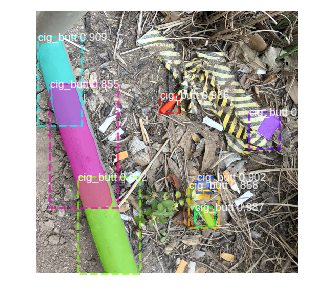

Processing 1 images
image                    shape: (512, 512, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  int64
anchors                  shape: (1, 65472, 4)         min:   -0.17712  max:    1.05188  float32


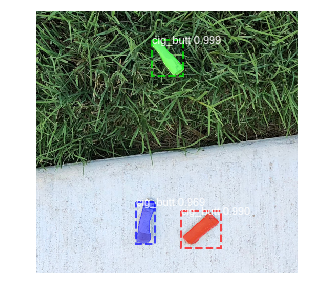

Processing 1 images
image                    shape: (512, 512, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  int64
anchors                  shape: (1, 65472, 4)         min:   -0.17712  max:    1.05188  float32


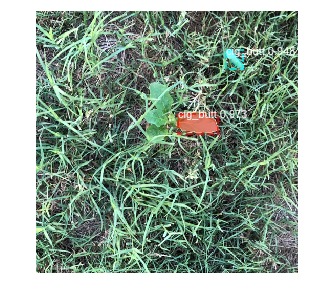

Processing 1 images
image                    shape: (512, 512, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  int64
anchors                  shape: (1, 65472, 4)         min:   -0.17712  max:    1.05188  float32


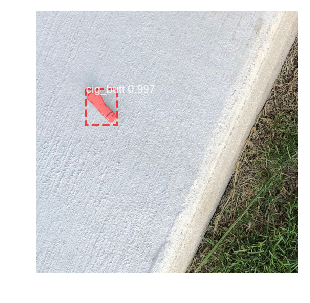

Processing 1 images
image                    shape: (512, 512, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  int64
anchors                  shape: (1, 65472, 4)         min:   -0.17712  max:    1.05188  float32


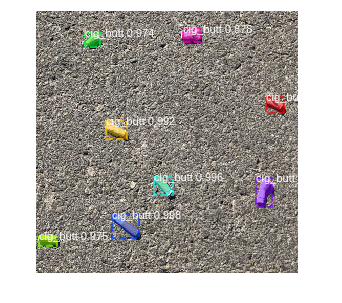

Processing 1 images
image                    shape: (512, 512, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  int64
anchors                  shape: (1, 65472, 4)         min:   -0.17712  max:    1.05188  float32


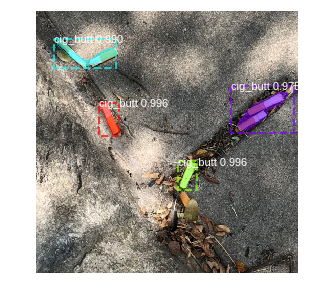

Processing 1 images
image                    shape: (512, 512, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  int64
anchors                  shape: (1, 65472, 4)         min:   -0.17712  max:    1.05188  float32


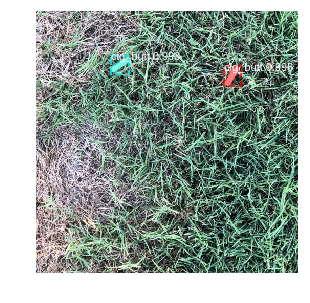

Processing 1 images
image                    shape: (512, 512, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  int64
anchors                  shape: (1, 65472, 4)         min:   -0.17712  max:    1.05188  float32


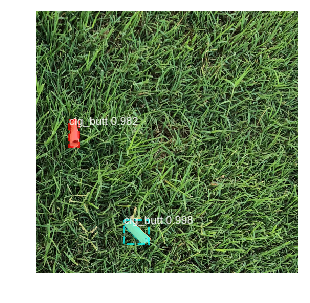

Processing 1 images
image                    shape: (512, 512, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -112.80000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  int64
anchors                  shape: (1, 65472, 4)         min:   -0.17712  max:    1.05188  float32


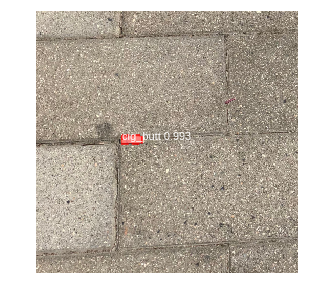

Processing 1 images
image                    shape: (512, 512, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -122.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  int64
anchors                  shape: (1, 65472, 4)         min:   -0.17712  max:    1.05188  float32


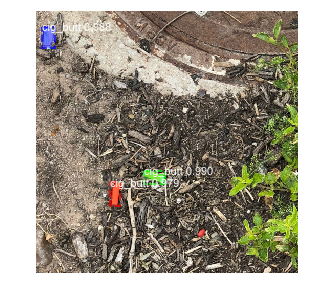

In [56]:
import skimage
real_test_dir = 'tutorials/datasets/cig_butts/real_test/'
image_paths = []
for filename in os.listdir(real_test_dir):
    if os.path.splitext(filename)[1].lower() in ['.png', '.jpg', '.jpeg']:
        image_paths.append(os.path.join(real_test_dir, filename))

for image_path in image_paths:
    img = skimage.io.imread(image_path)
    img_arr = np.array(img)
    results = model.detect([img_arr], verbose=1)
    r = results[0]
    visualize.display_instances(img, r['rois'], r['masks'], r['class_ids'], 
                                dataset_val.class_names, r['scores'], figsize=(5,5))